### Data Preprocessing:

In [1]:
import pandas as pd
import glob

# Define the pattern to match the files
pattern = './opl-data/meet-data/*/*/entries.csv'

# Use glob.glob to find all files matching the pattern
files = glob.glob(pattern, recursive=True)

# Read each file and append it to a list of DataFrames
dfs = [pd.read_csv(file) for file in files]

# Concatenate all DataFrames in the list into a single DataFrame
df = pd.concat(dfs, ignore_index=True)

In [307]:
# df = pd.concat(dfs, ignore_index=True)

In [308]:
df.isna().mean(axis='rows').sort_values()

Place                 0.000000
Sex                   0.000000
Event                 0.000000
Equipment             0.000000
Division              0.000138
Name                  0.006355
WeightClassKg         0.010993
BodyweightKg          0.060002
TotalKg               0.068067
Best3BenchKg          0.116559
Best3DeadliftKg       0.272376
Best3SquatKg          0.330545
Bench1Kg              0.500461
Bench2Kg              0.506173
Bench3Kg              0.521359
Deadlift1Kg           0.633049
Deadlift2Kg           0.639441
Deadlift3Kg           0.653802
BirthYear             0.665122
Squat1Kg              0.675704
Team                  0.677539
Squat2Kg              0.679035
Squat3Kg              0.687556
Age                   0.757822
State                 0.769266
CyrillicName          0.817785
Country               0.826567
Tested                0.875223
BirthDate             0.915409
Deadlift4Kg           0.992001
Bench4Kg              0.992817
JapaneseName          0.992874
AgeRange

In [311]:
df = df[df['Equipment'] == 'Raw']

In [312]:
df = df.filter(['Name', 'Sex', 'Best3SquatKg', 'Best3BenchKg', 'Best3DeadliftKg', 'TotalKg', 'BodyweightKg'])

In [314]:
df = df.dropna()

#### What kind of distribution are we dealing with

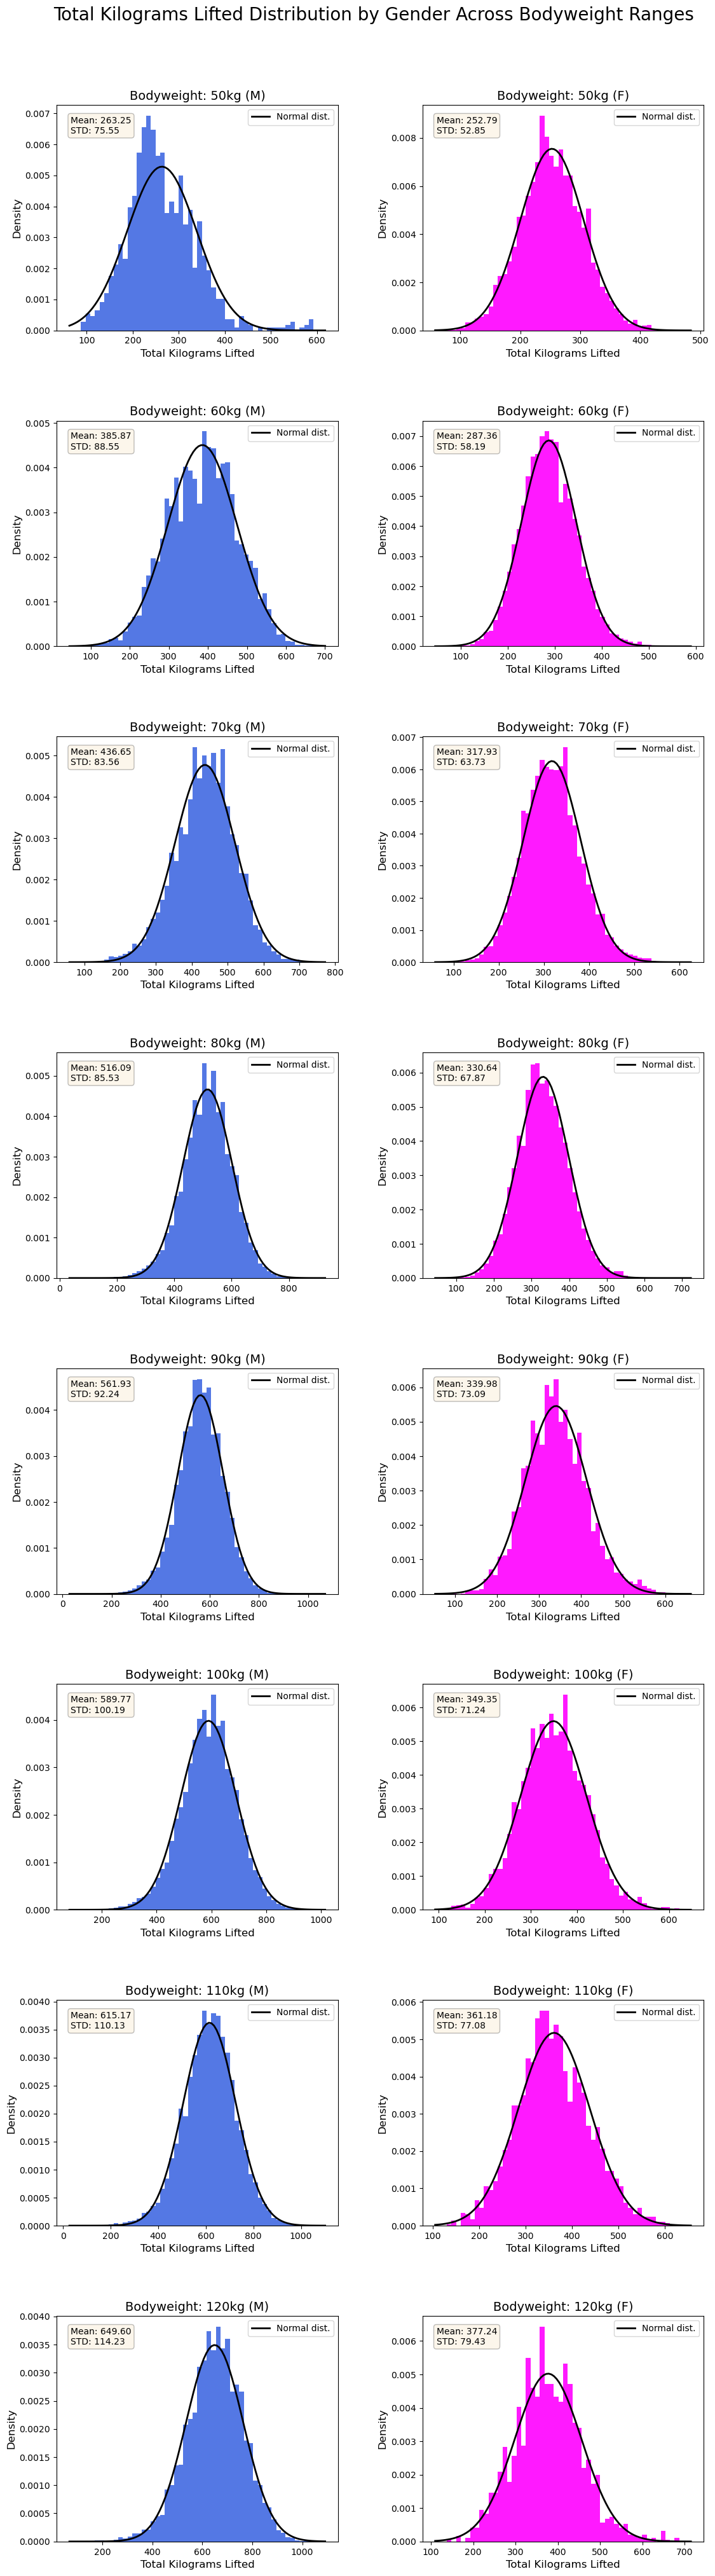

In [342]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Assuming your DataFrame comes from pandas
from scipy.stats import norm

col = 'TotalKg'

# Define the bodyweight increments and genders
bodyweights_kg = np.arange(50, 121, 10)  # From 50kg to 120kg in 10kg increments
genders = ['M', 'F']

# Create an 8x2 grid of plots
fig, axes = plt.subplots(nrows=8, ncols=2, figsize=(12, 40))
fig.tight_layout(pad=5.0)

# Main title
fig.suptitle('Total Kilograms Lifted Distribution by Gender Across Bodyweight Ranges', fontsize=20, y=1.02)

# Gender-specific color scheme
colors = {'M': 'royalblue', 'F': 'magenta'}

# Iterate through each bodyweight range
for i, bodyweight in enumerate(bodyweights_kg):
    # Iterate through each gender
    for j, sex in enumerate(genders):
        # Adjust index for men on the left, women on the right
        col_index = 0 if sex == 'M' else 1

        # Filter the DataFrame
        filtered_df = df[(df['BodyweightKg'] >= (bodyweight * 0.975)) & 
                         (df['BodyweightKg'] <= (bodyweight * 1.025)) & 
                         (df['Sex'] == sex)]
        if not filtered_df.empty:
            mean = filtered_df[col].mean()
            std = filtered_df[col].std()

            # Histogram with gender-specific color
            axes[i, col_index].hist(filtered_df[col], bins=50, alpha=0.9, color=colors[sex], density=True)

            # Normal distribution curve
            xmin, xmax = axes[i, col_index].get_xlim()
            x = np.linspace(xmin, xmax, 100)
            p = norm.pdf(x, mean, std)
            axes[i, col_index].plot(x, p, 'k', linewidth=2, label='Normal dist.')

            # Displaying mean and std
            textstr = f'Mean: {mean:.2f}\nSTD: {std:.2f}'
            props = dict(boxstyle='round', facecolor='wheat', alpha=0.25)
            axes[i, col_index].text(0.05, 0.95, textstr, transform=axes[i, col_index].transAxes, fontsize=10,
                                    verticalalignment='top', bbox=props)

            # Improved titles and labels
            axes[i, col_index].set_title(f'Bodyweight: {bodyweight}kg ({sex})', fontsize=14)
            axes[i, col_index].set_xlabel(f'Total Kilograms Lifted', fontsize=12)
            axes[i, col_index].set_ylabel('Density', fontsize=12)
            axes[i, col_index].legend()
        else:
            axes[i, col_index].text(0.5, 0.5, 'No Data', horizontalalignment='center', verticalalignment='center', transform=axes[i, col_index].transAxes)
            axes[i, col_index].set_title(f'Bodyweight: {bodyweight}kg ({sex})', fontsize=14)
            axes[i, col_index].set_xlabel(f'Total Kilograms Lifted', fontsize=12)
            axes[i, col_index].set_ylabel('Density', fontsize=12)

# Adjust layout to make room for the main title
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()


M 150 689.46 682.0976266339869 134.09989243411846


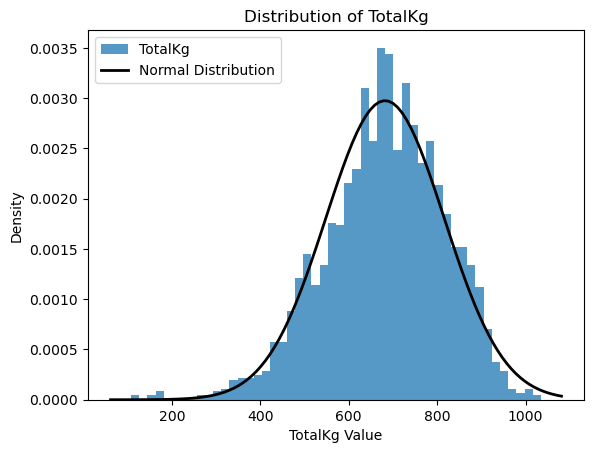

In [323]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

col = 'TotalKg'
bodyweight = np.random.randint(32, 180)
sex = 'M' if np.random.rand() < 0.5 else 'F'
filtered_df = df[(df['BodyweightKg'] >= (bodyweight * 0.975)) & (df['BodyweightKg'] <= (bodyweight * 1.025)) & (df['Sex'] == sex)]
mean = filtered_df[col].mean()
std = filtered_df[col].std()

print(sex, bodyweight, filtered_df[col].median(), mean, std)

# Plotting the histogram of the selected column
plt.hist(filtered_df[col], bins=50, alpha=0.75, label=col, density=True)

# Generate data for the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean, std)

# Plot the normal distribution curve
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')

plt.xlabel(f'{col} Value')  # Make sure to replace 'Value' with something more descriptive based on your column
plt.ylabel('Density')
plt.title(f'Distribution of {col}')
plt.legend()
plt.show()

Tested: M 51 295.0 292.23642335766425 67.31412175649969

Non-tested: M 51 220.0 229.65686274509804 70.41842728974274

Tested: M 150 675.25 669.1323015873018 120.84186771268952

Non-tested: M 150 750.0 696.5684210526315 194.68832657076277

Tested: M 90 565.0 562.7309086088034 89.20679249998108 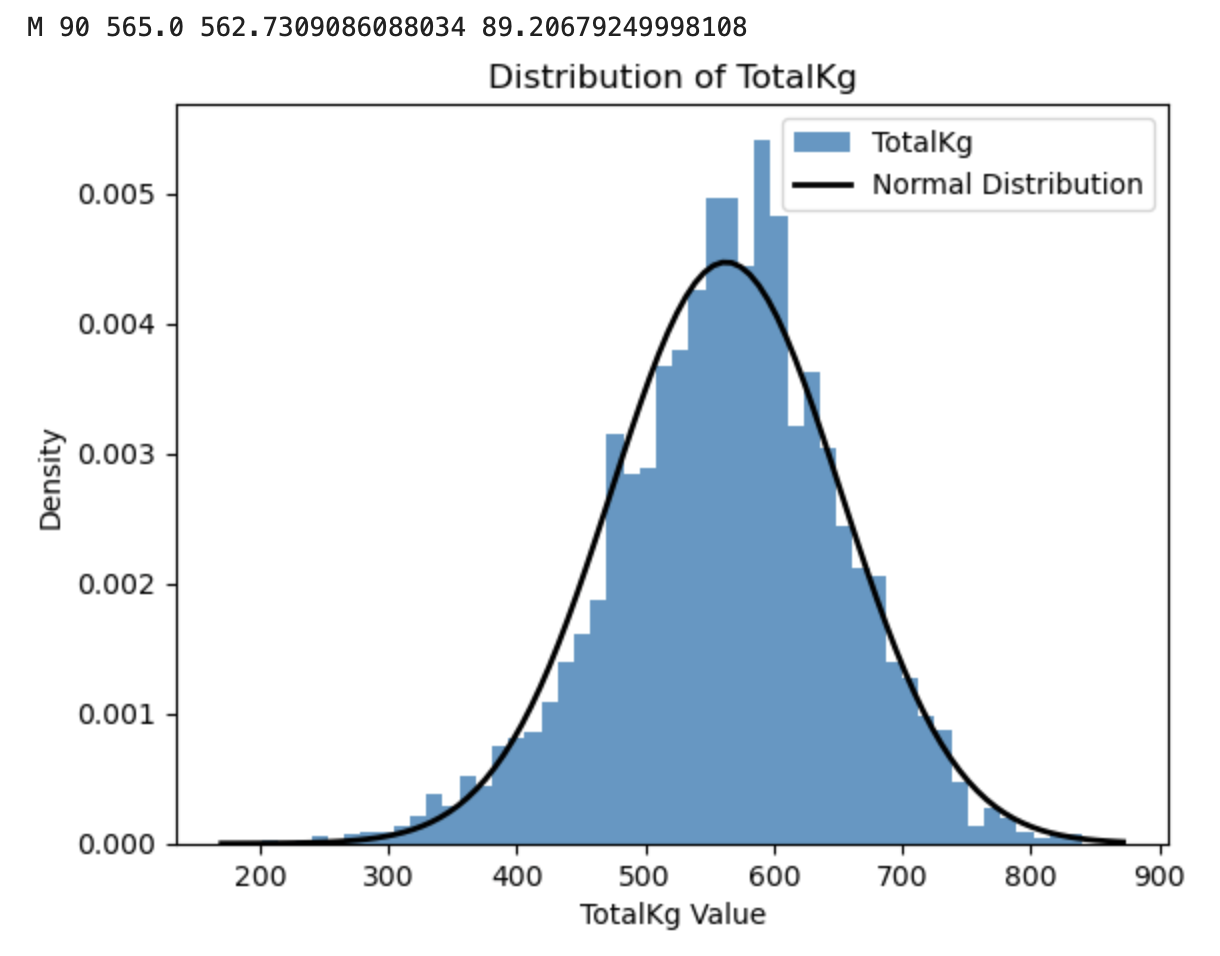

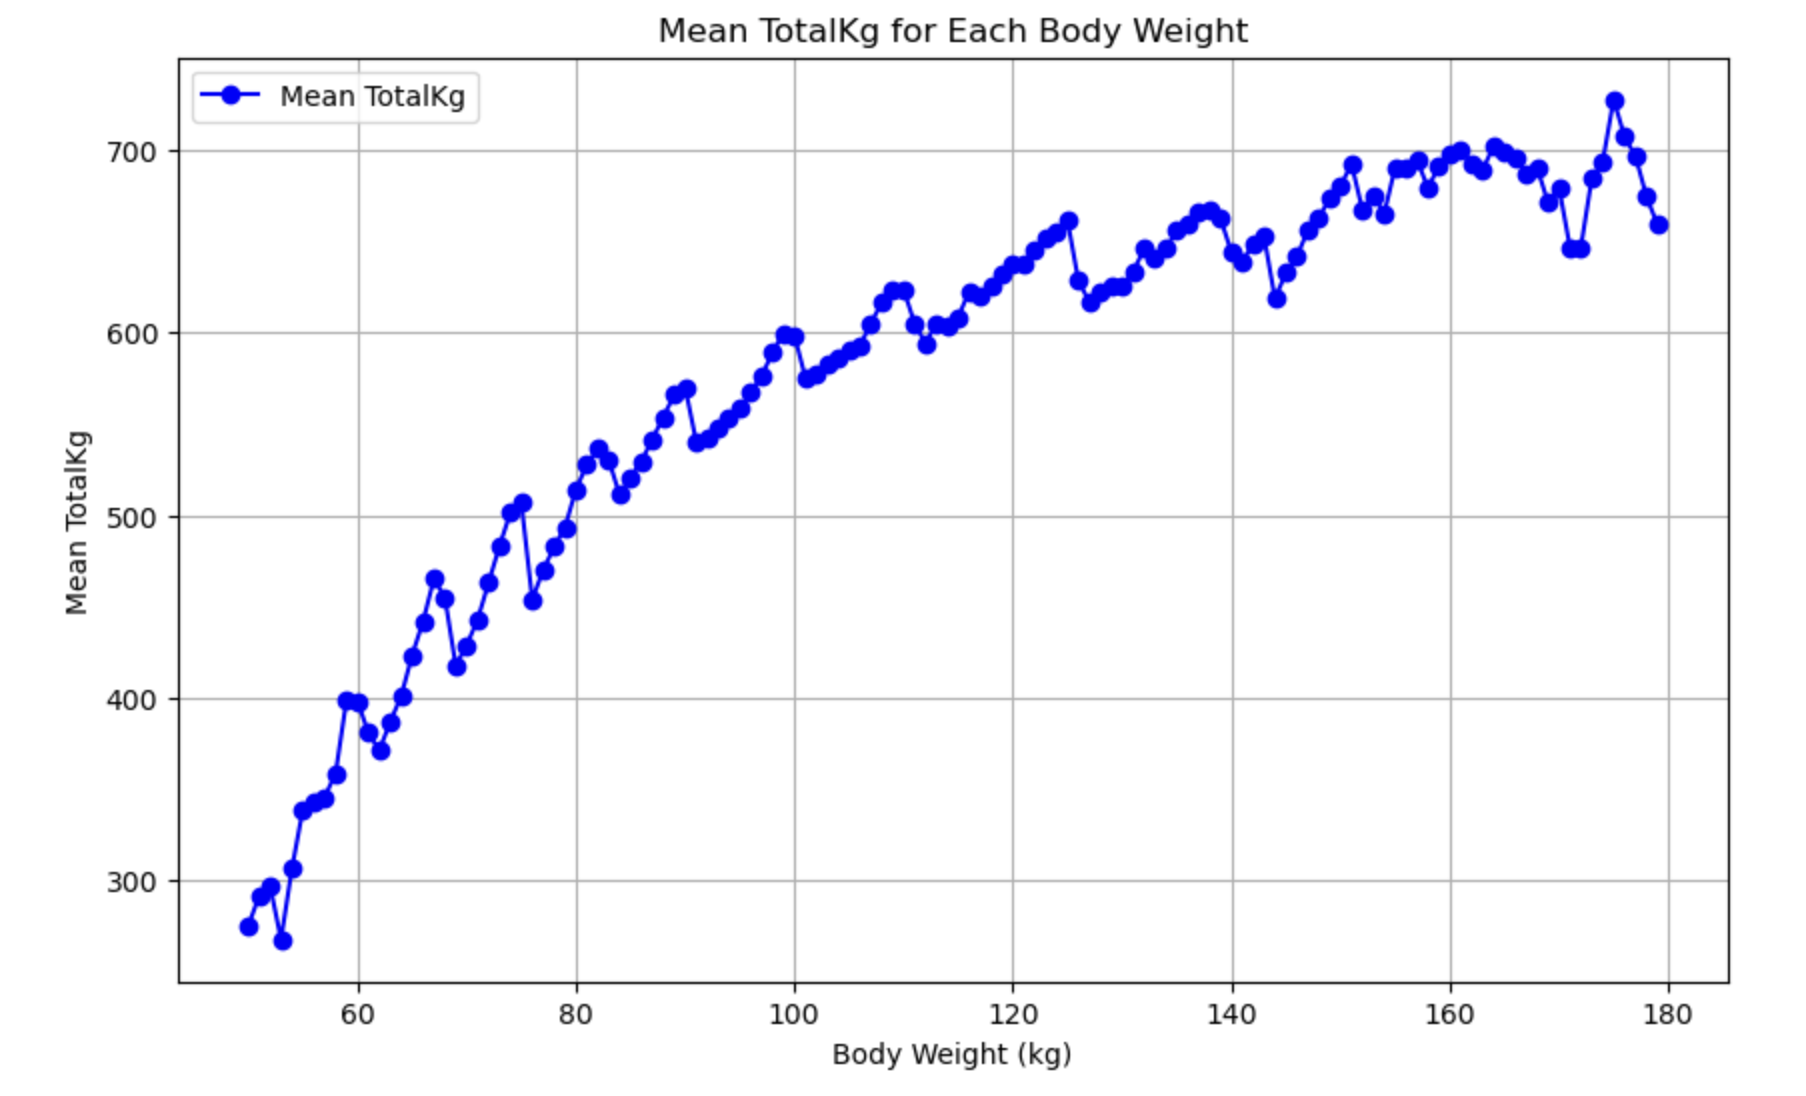

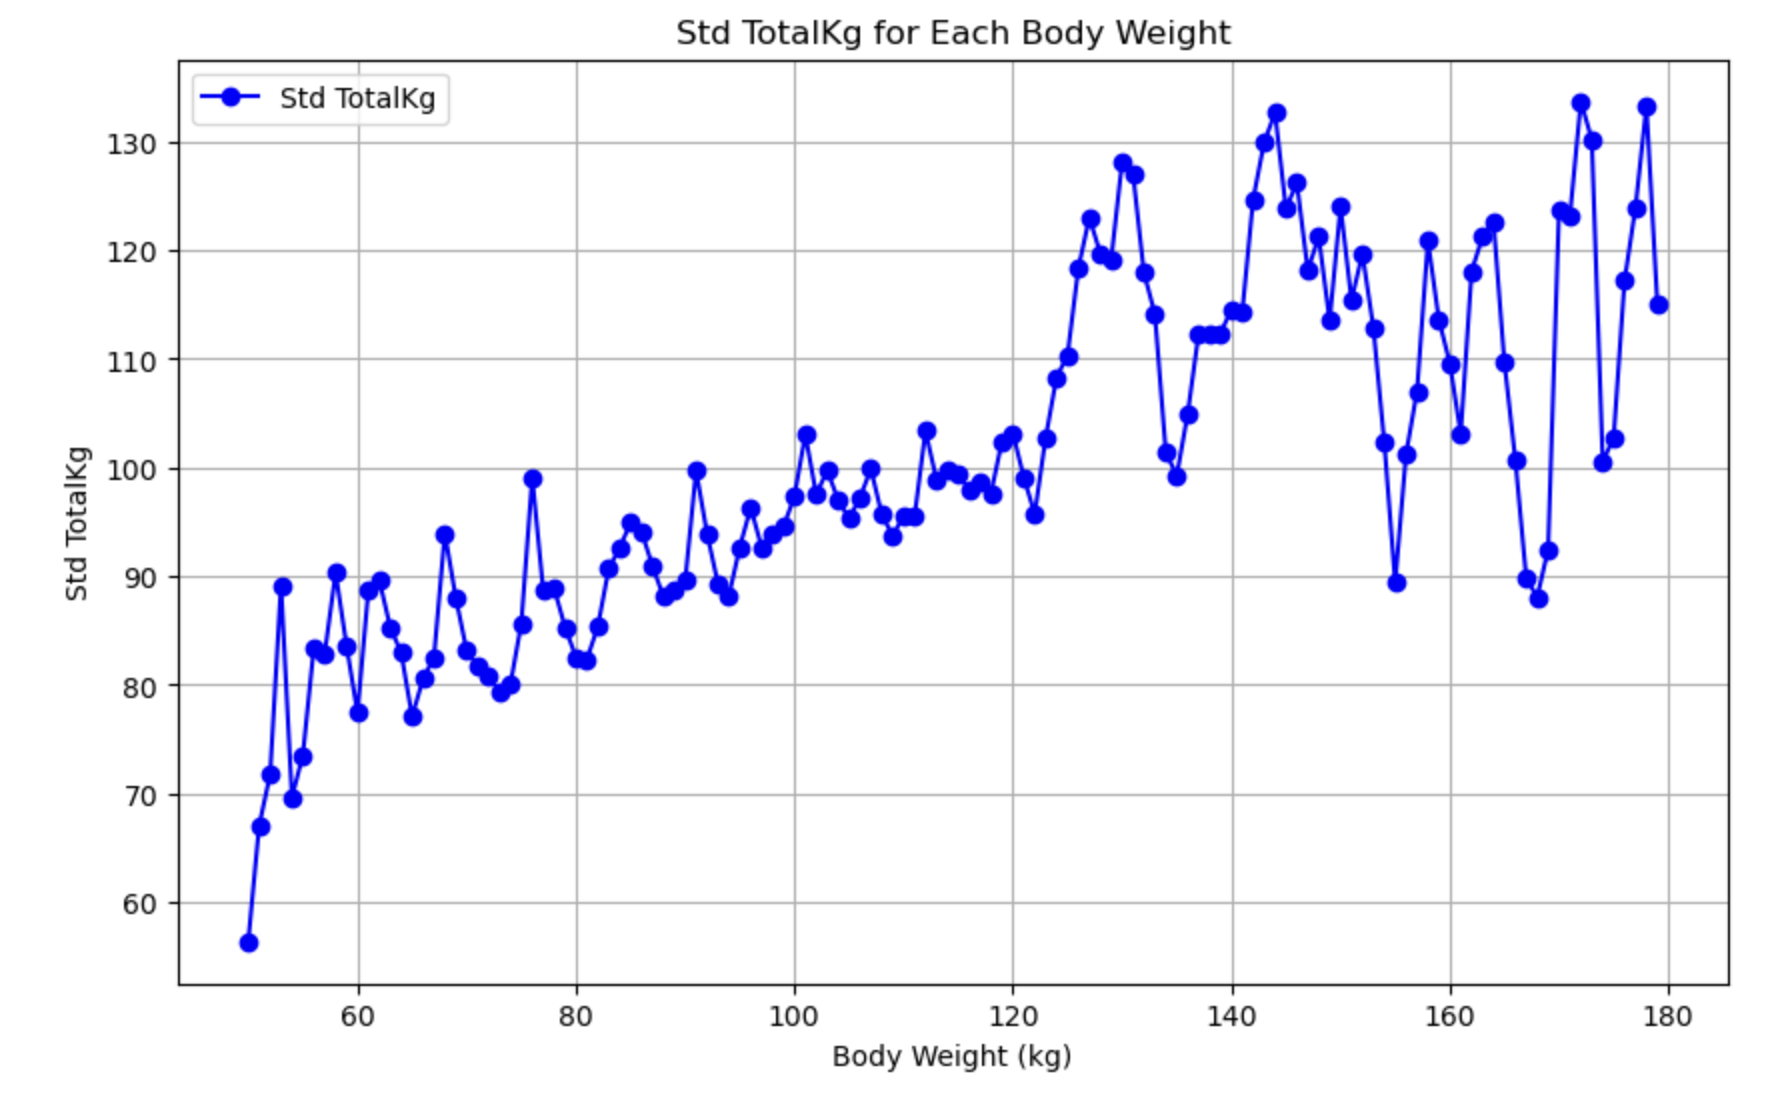

Non Tested: M 90 585.0 576.1844752818733 102.89679310271303 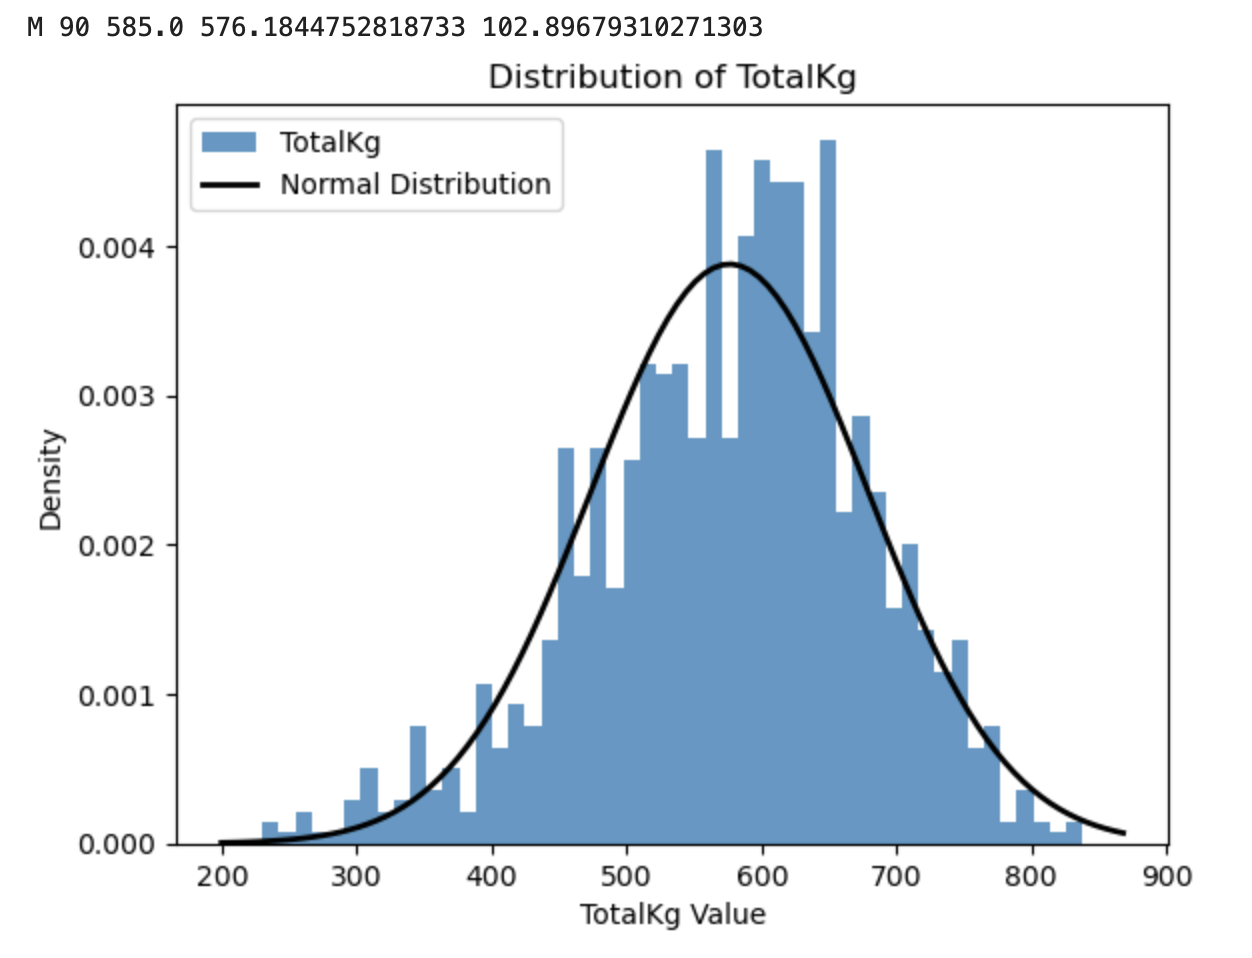

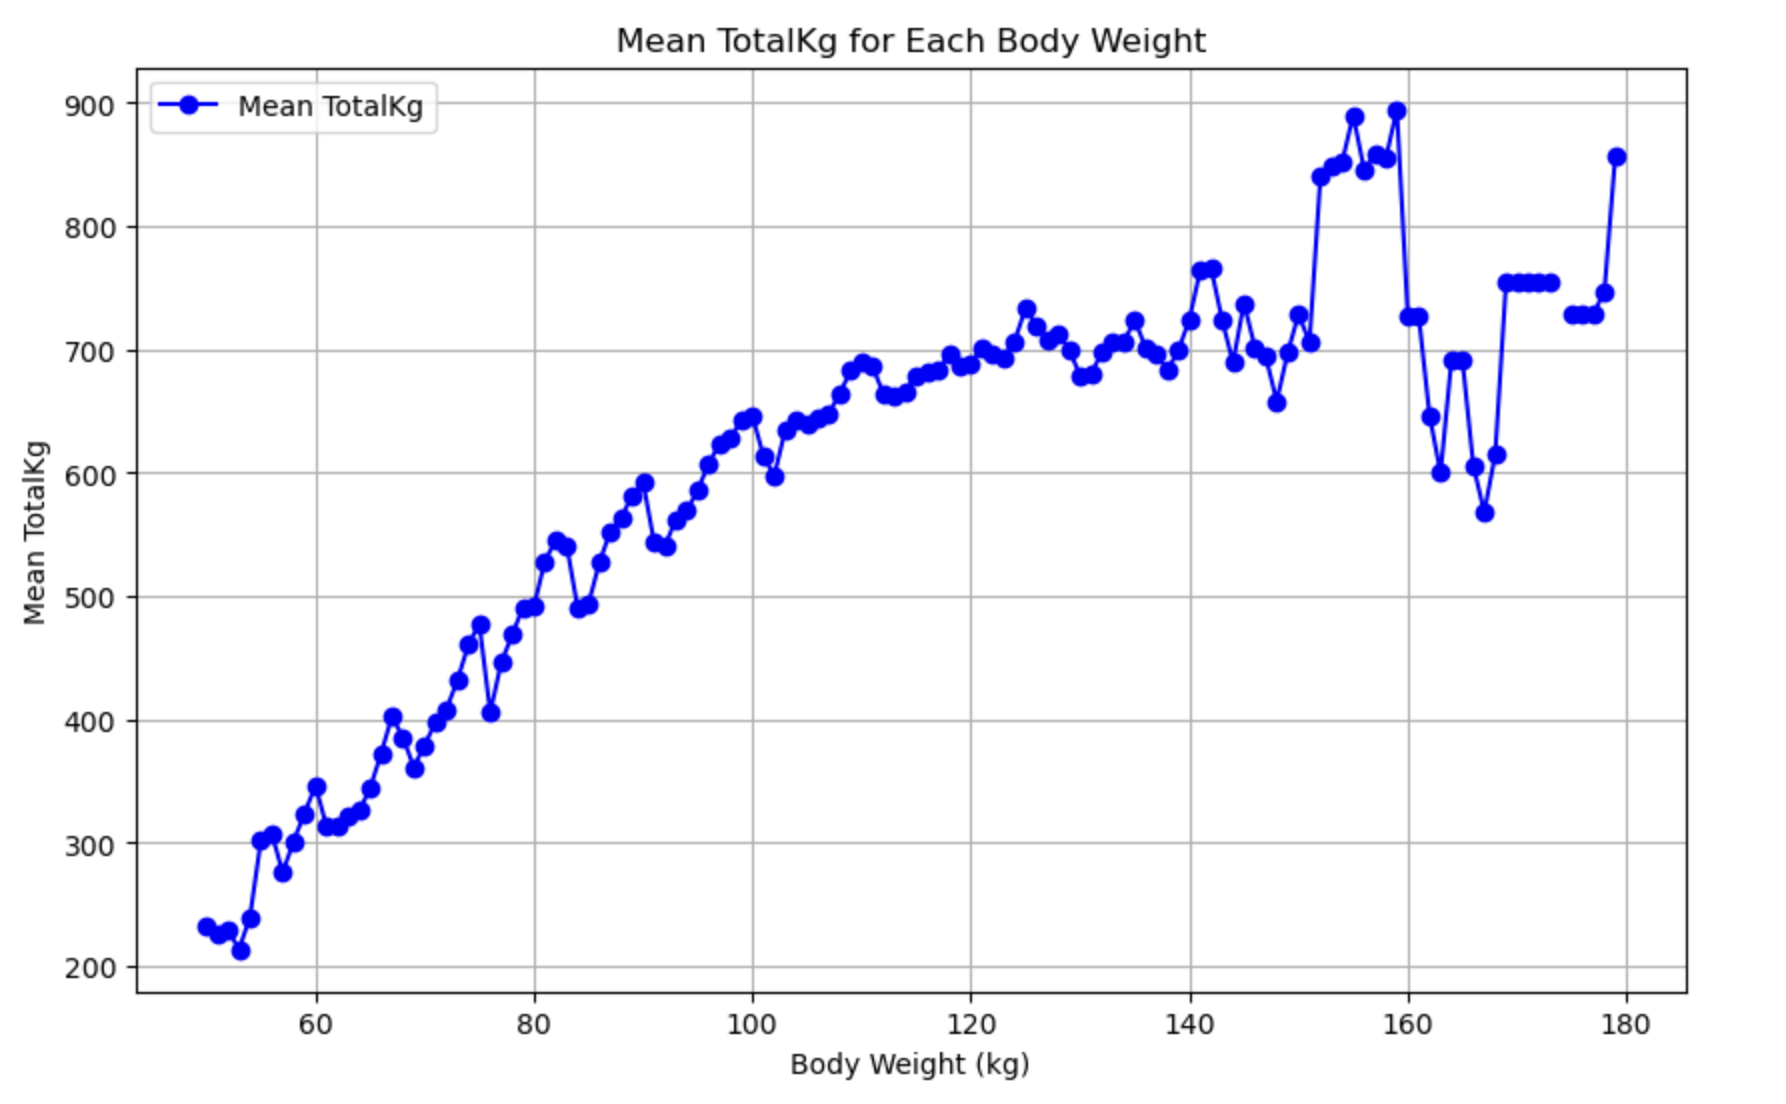

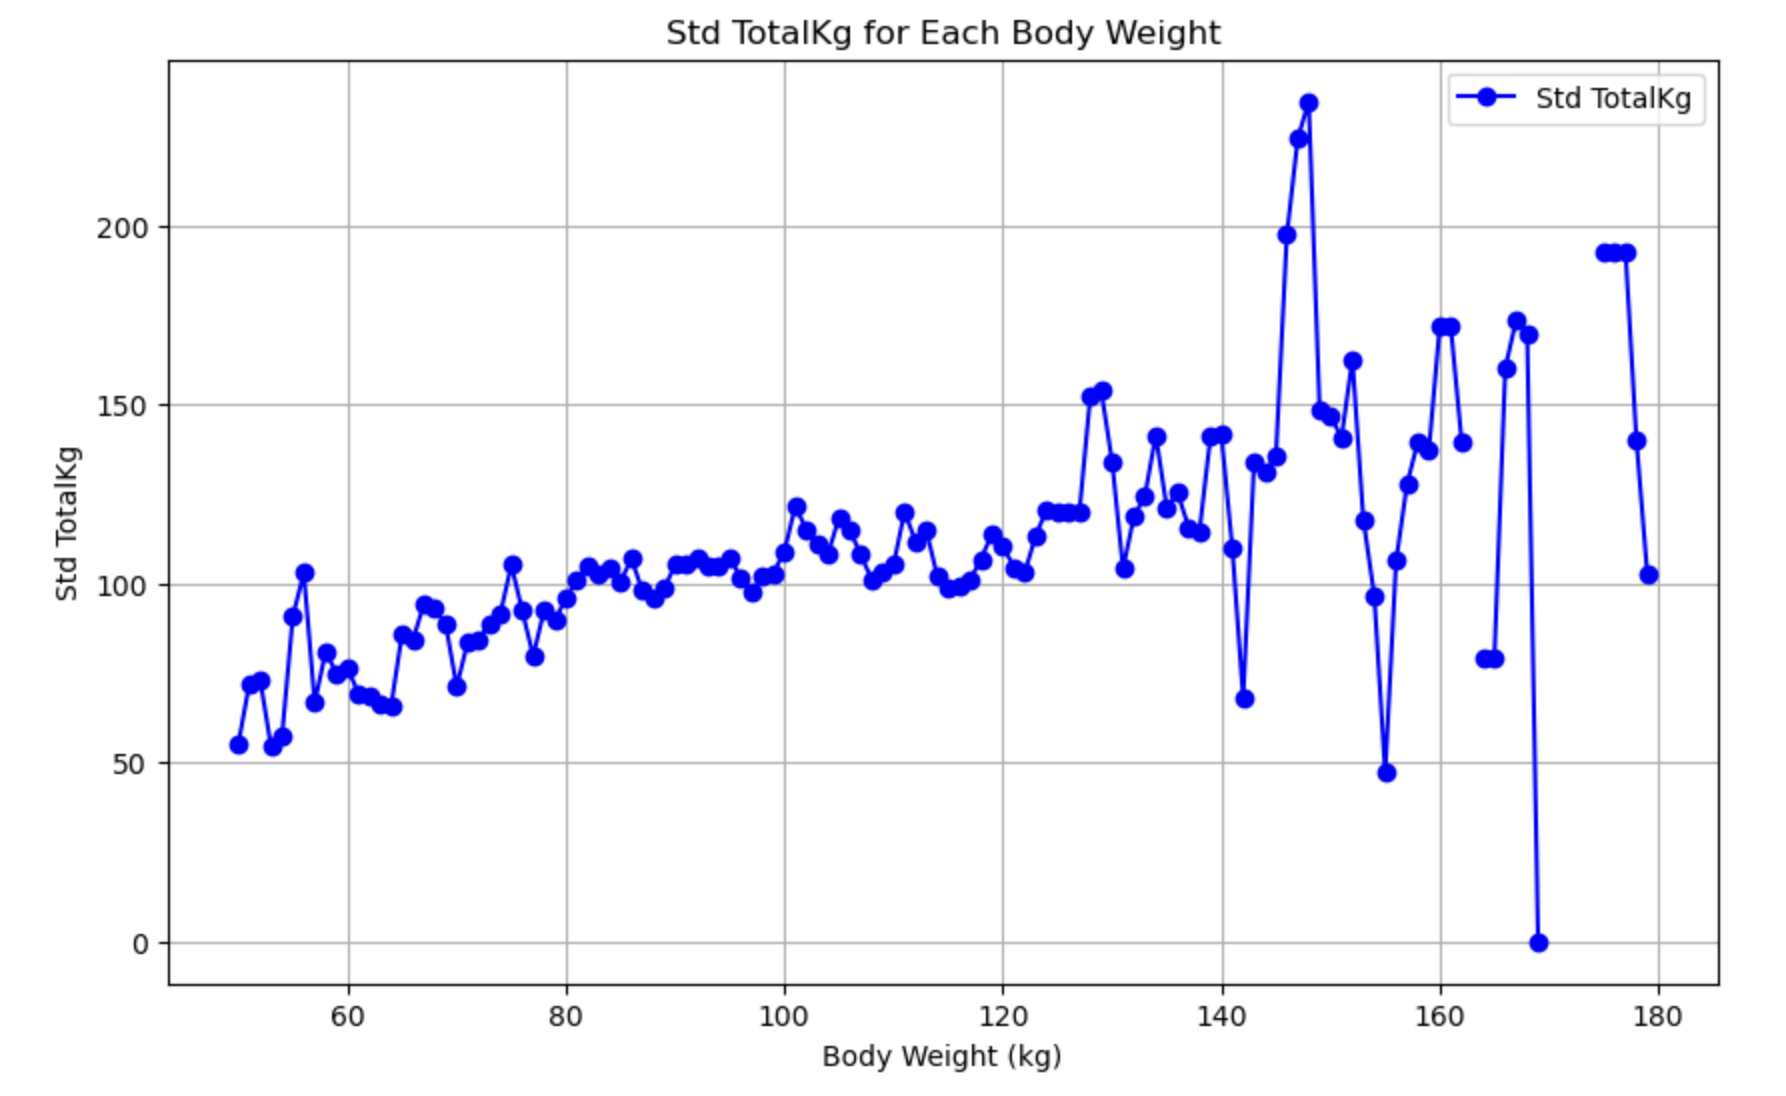

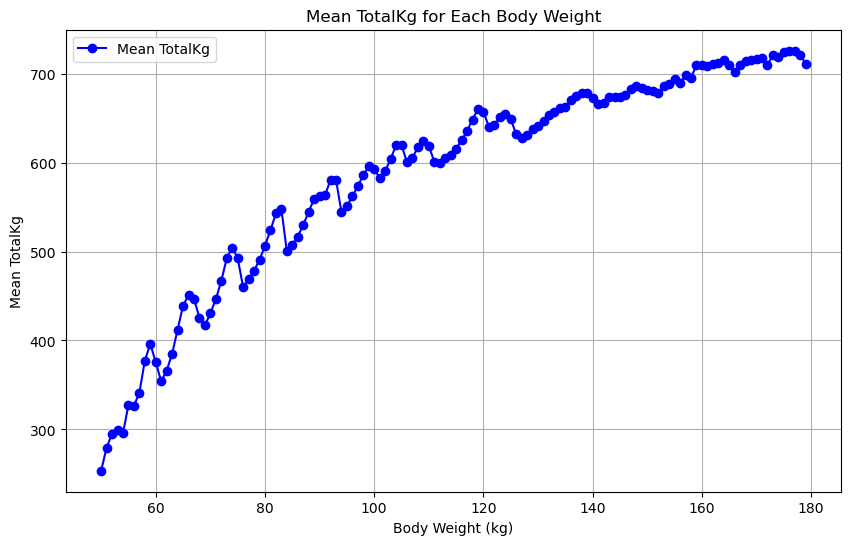

In [317]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Assuming you're using pandas for your dataframe

# Initialize lists to store body weights and their corresponding mean TotalKg
body_weights = np.arange(50, 180, 1)
mean_total_kgs = []
std_total_kgs = []

for bodyweight in body_weights:
    filtered_df = df[(df['BodyweightKg'] >= (bodyweight * 0.99)) & (df['BodyweightKg'] <= (bodyweight * 1.01)) & (df['Sex'] == 'M')]
    # filtered_df = df[(df['BodyweightKg'] >= (bodyweight * 0.99)) & (df['BodyweightKg'] <= (bodyweight * 1.01)) & (df['Sex'] == 'F')]
    # filtered_df = df[(df['BodyweightKg'] >= (bodyweight * 0.99)) & (df['BodyweightKg'] <= (bodyweight * 1.01))]
    # Calculate and store the mean TotalKg for the filtered dataframe
    mean = filtered_df['TotalKg'].mean()
    std = filtered_df['TotalKg'].std()
    mean_total_kgs.append(mean)
    std_total_kgs.append(std)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(body_weights, mean_total_kgs, marker='o', linestyle='-', color='b', label='Mean TotalKg')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Mean TotalKg')
plt.title('Mean TotalKg for Each Body Weight')
plt.legend()
plt.grid(True)
plt.show()

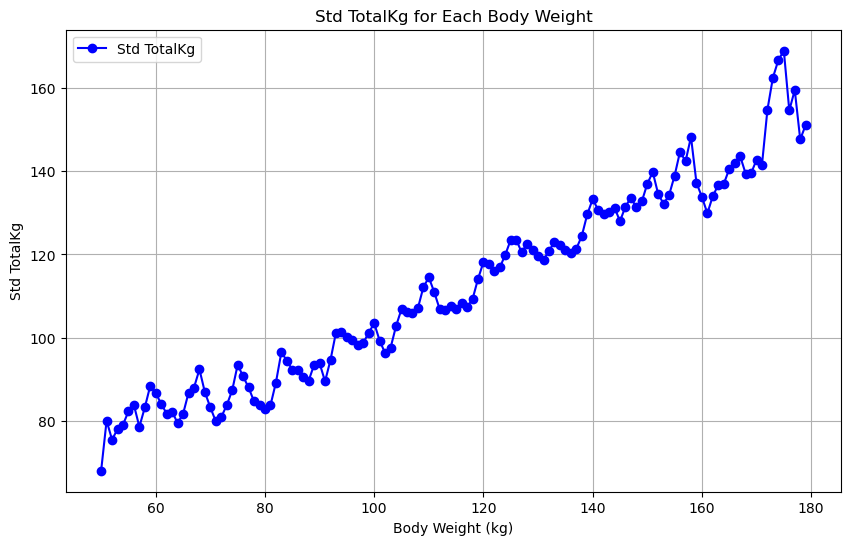

In [318]:
### Plotting
plt.figure(figsize=(10, 6))
plt.plot(body_weights, std_total_kgs, marker='o', linestyle='-', color='b', label='Std TotalKg')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Std TotalKg')
plt.title('Std TotalKg for Each Body Weight')
plt.legend()
plt.grid(True)
plt.show()

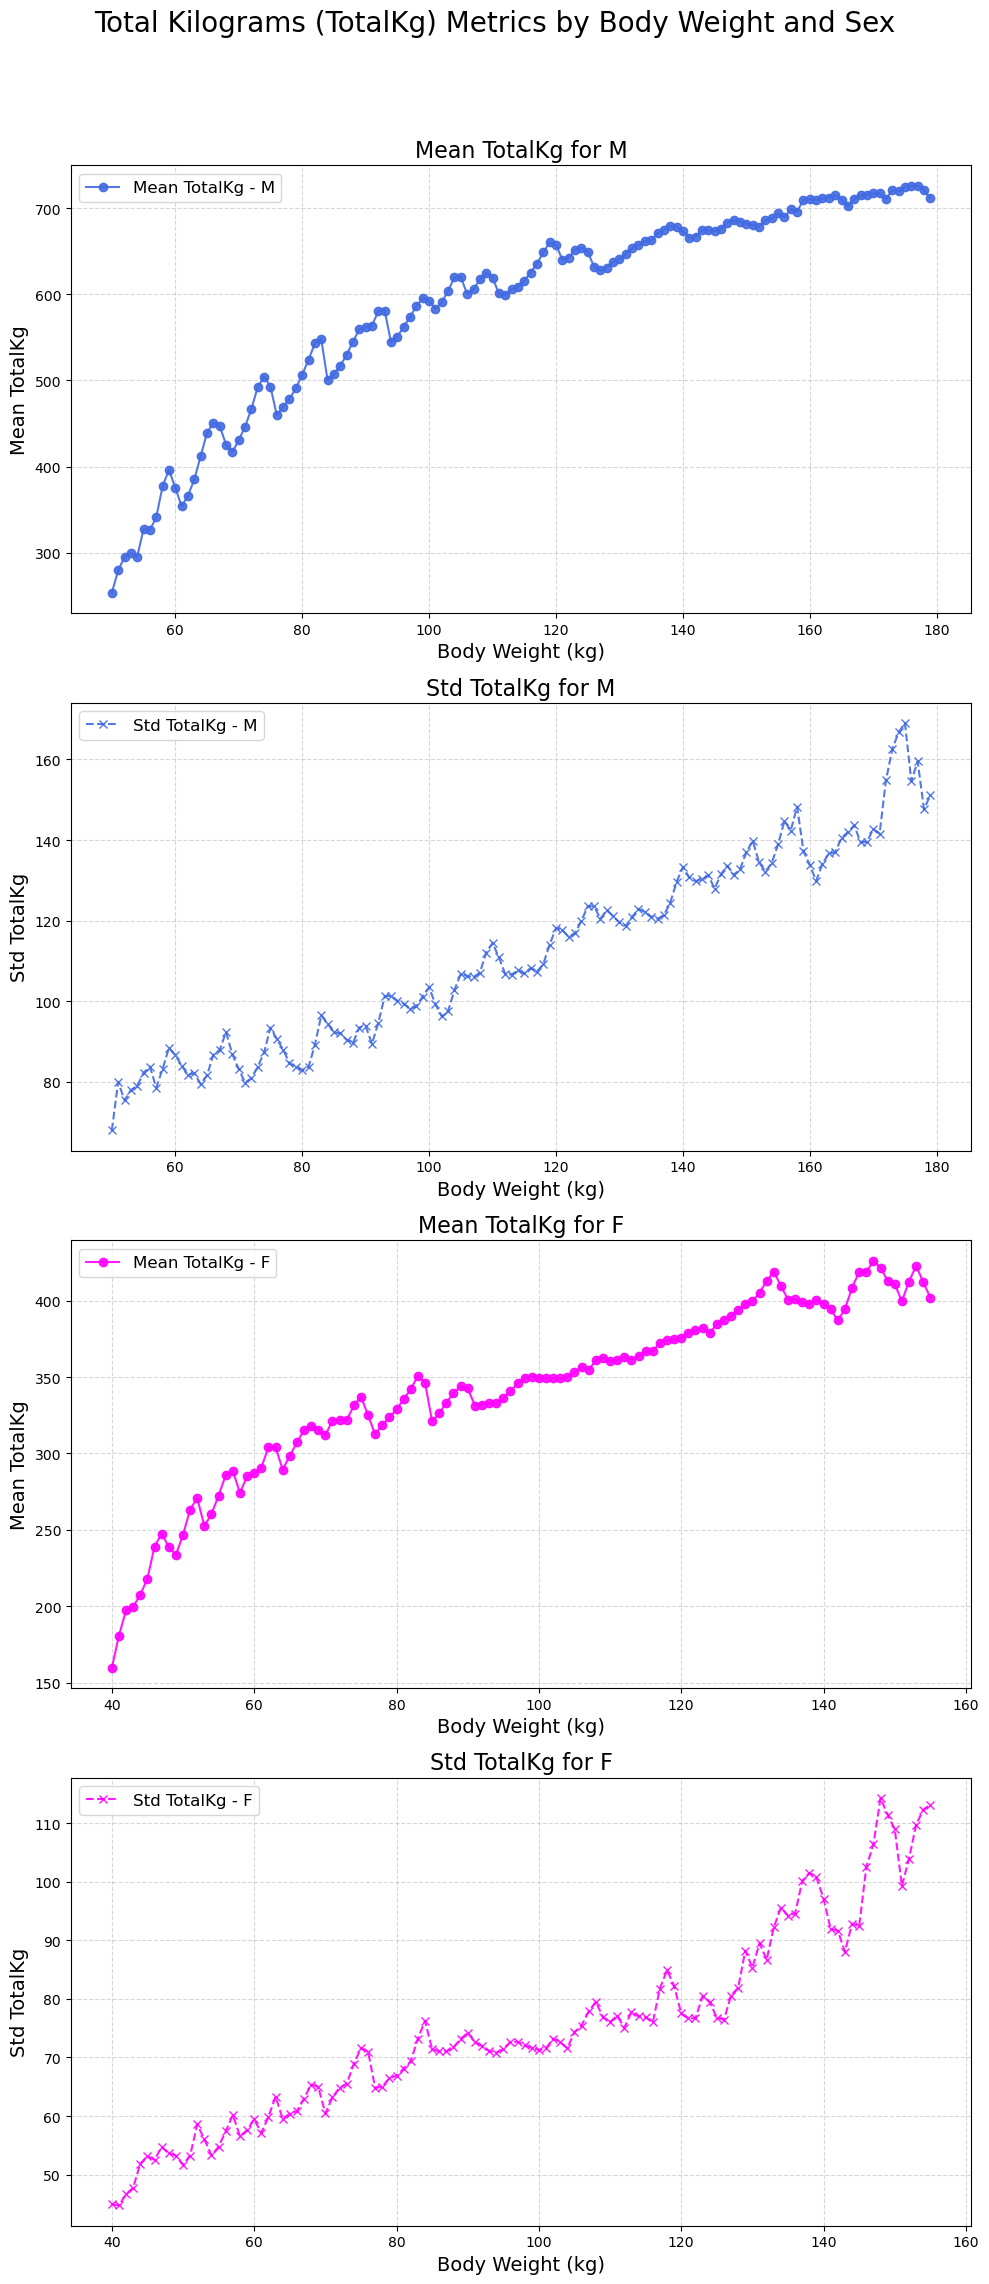

In [344]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Assuming you're using pandas for your dataframe

# Assuming 'df' is your DataFrame containing 'BodyweightKg', 'TotalKg', and 'Sex' columns
# Example df creation (replace with actual DataFrame loading)
# df = pd.read_csv('path_to_your_data.csv')

# Setup the figure and axes for a 4x1 grid of plots
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(10, 24))  # Adjusted figsize for better aspect ratio in 4x1 layout
fig.suptitle('Total Kilograms (TotalKg) Metrics by Body Weight and Sex', fontsize=20)

# Define sex-specific weight ranges
sex_weight_ranges = {'M': np.arange(50, 180, 1), 'F': np.arange(40, 156, 1)}

# Define color and marker schemes for visual distinction
colors = {'M': 'royalblue', 'F': 'magenta'}
markers = {'mean': 'o', 'std': 'x'}

for i, (sex, body_weights) in enumerate(sex_weight_ranges.items()):
    mean_total_kgs = []
    std_total_kgs = []
    
    for bodyweight in body_weights:
        # Filter the dataframe for a specific body weight range and sex
        filtered_df = df[(df['BodyweightKg'] >= (bodyweight * 0.99)) & (df['BodyweightKg'] <= (bodyweight * 1.01)) & (df['Sex'] == sex)]
        
        # Calculate and store the mean and std of TotalKg for the filtered dataframe
        mean = filtered_df['TotalKg'].mean()
        std = filtered_df['TotalKg'].std()
        mean_total_kgs.append(mean)
        std_total_kgs.append(std)

    # Plotting mean TotalKg for the current sex
    axes[i*2].plot(body_weights, mean_total_kgs, alpha=0.9, marker=markers['mean'], linestyle='-', color=colors[sex], label=f'Mean TotalKg - {sex}')
    axes[i*2].set_title(f'Mean TotalKg for {sex}', fontsize=16)
    axes[i*2].set_xlabel('Body Weight (kg)', fontsize=14)
    axes[i*2].set_ylabel('Mean TotalKg', fontsize=14)
    axes[i*2].legend(fontsize=12)
    axes[i*2].grid(True, linestyle='--', alpha=0.5)
    
    # Plotting std TotalKg for the current sex
    axes[i*2 + 1].plot(body_weights, std_total_kgs, alpha=0.9, marker=markers['std'], linestyle='--', color=colors[sex], label=f'Std TotalKg - {sex}')
    axes[i*2 + 1].set_title(f'Std TotalKg for {sex}', fontsize=16)
    axes[i*2 + 1].set_xlabel('Body Weight (kg)', fontsize=14)
    axes[i*2 + 1].set_ylabel('Std TotalKg', fontsize=14)
    axes[i*2 + 1].legend(fontsize=12)
    axes[i*2 + 1].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust the layout to make room for the suptitle
plt.show()


/var/folders/pb/s8g_3fjd0t15q15k4bn_d_yw0000gn/T/ipykernel_3476/2370842448.py:14: RuntimeWarning: invalid value encountered in log
  return A * np.log(B * x + C)


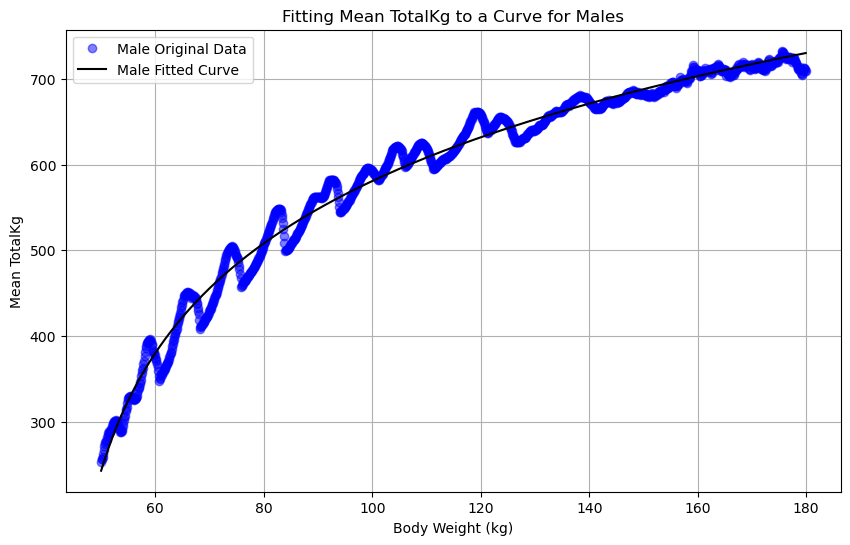

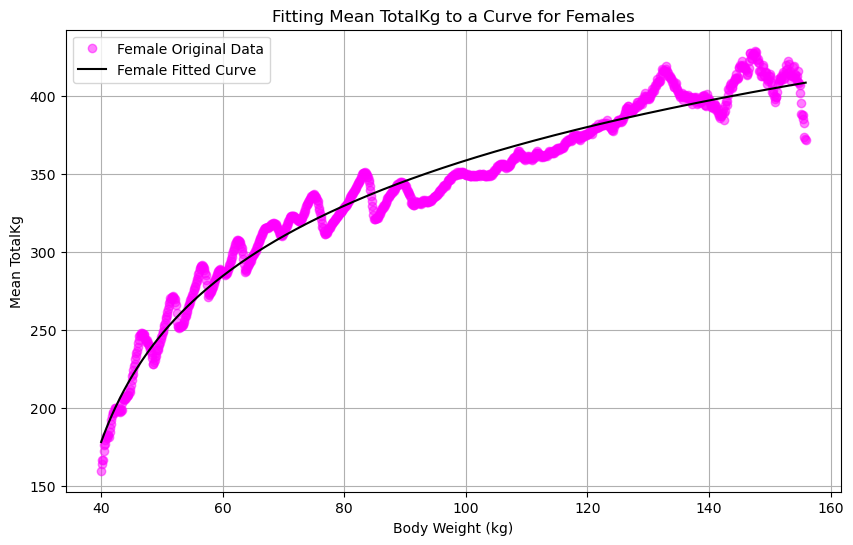

(array([172.60089846,   0.49685382, -20.75020586]),
 array([ 82.83876087,   1.12346554, -36.36091256]))

In [362]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Assuming you're using pandas for your dataframe

np.random.seed(0)  # For reproducibility

# Assuming 'df' is your DataFrame containing 'BodyweightKg', 'TotalKg', and 'Sex' columns
# Example df creation (replace with actual DataFrame loading)
# df = pd.read_csv('path_to_your_data.csv')

# Define the curve function
def mean_curve_func(x, A, B, C):
    return A * np.log(B * x + C)

# Function to calculate mean_total_kgs and fit curve for a given sex
def fit_curve_for_sex(df, sex, body_weights_range):
    mean_total_kgs = []
    for bodyweight in body_weights_range:
        filtered_df = df[(df['BodyweightKg'] >= (bodyweight * 0.99)) & (df['BodyweightKg'] <= (bodyweight * 1.01)) & (df['Sex'] == sex)]
        mean = filtered_df['TotalKg'].mean()
        mean_total_kgs.append(mean)
    
    # Use curve_fit to find the best fitting parameters A, B, and C
    popt, pcov = curve_fit(mean_curve_func, body_weights_range, mean_total_kgs, maxfev=1000)
    
    # Using the optimal parameters to generate the fitted curve
    fitted_curve = mean_curve_func(body_weights_range, *popt)
    
    return mean_total_kgs, fitted_curve, popt

# Defining body weight ranges for M and F
body_weights_m = np.arange(50, 180, 0.1)
body_weights_f = np.arange(40, 156, 0.1)

# Fit curve for males
mean_total_kgs_m, fitted_curve_m, popt_m = fit_curve_for_sex(df, 'M', body_weights_m)

# Fit curve for females
mean_total_kgs_f, fitted_curve_f, popt_f = fit_curve_for_sex(df, 'F', body_weights_f)

# Plotting for males
plt.figure(figsize=(10, 6))
plt.plot(body_weights_m, mean_total_kgs_m, 'o', label='Male Original Data', color='blue', alpha=0.5)
plt.plot(body_weights_m, fitted_curve_m, '-', label='Male Fitted Curve', color='black')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Mean TotalKg')
plt.title('Fitting Mean TotalKg to a Curve for Males')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for females
plt.figure(figsize=(10, 6))
plt.plot(body_weights_f, mean_total_kgs_f, 'o', label='Female Original Data', color='magenta', alpha=0.5)
plt.plot(body_weights_f, fitted_curve_f, '-', label='Female Fitted Curve', color='black')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Mean TotalKg')
plt.title('Fitting Mean TotalKg to a Curve for Females')
plt.legend()
plt.grid(True)
plt.show()

# Returning the optimal parameters for visibility
popt_m, popt_f


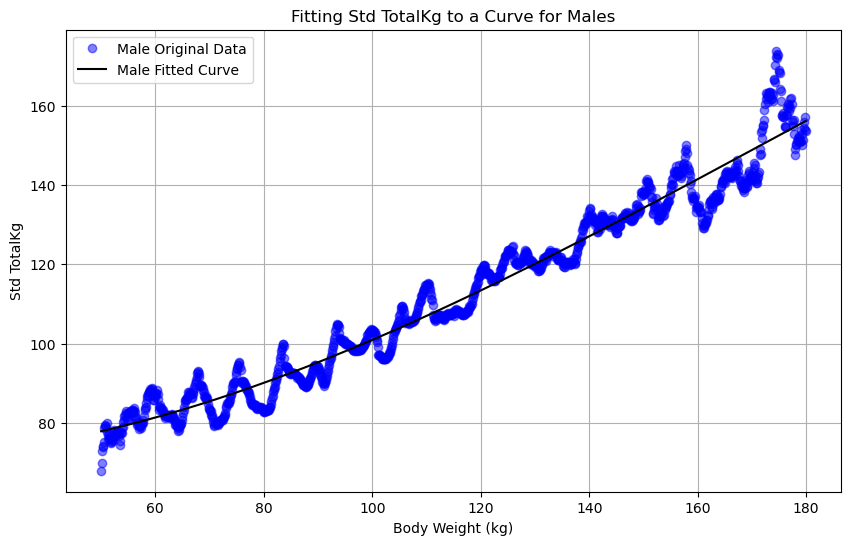

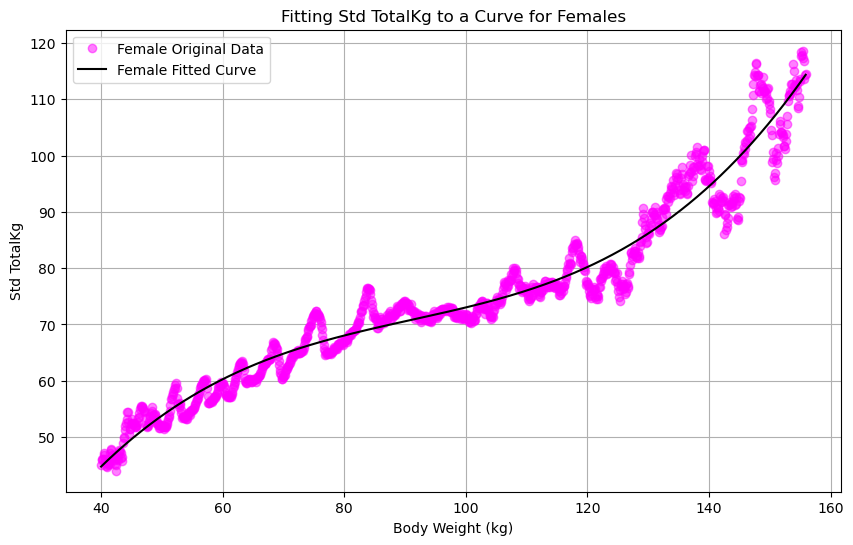

(array([ 7.20417687e+01, -9.97658687e-02,  4.81197933e-03, -9.22177475e-06]),
 array([-2.94415927e+01,  2.82254989e+00, -2.83382241e-02,  1.03593030e-04]))

In [365]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd  # Assuming you're using pandas for your dataframe

np.random.seed(0)  # For reproducibility

# Define the curve function for standard deviation
def std_curve_func(x, A, B, C, D): 
    return A + B * x + C * x ** 2 + D * x ** 3

# Function to calculate std_total_kgs and fit curve for a given sex
def fit_curve_for_sex_std(df, sex, body_weights_range):
    std_total_kgs = []
    for bodyweight in body_weights_range:
        filtered_df = df[(df['BodyweightKg'] >= (bodyweight * 0.99)) & (df['BodyweightKg'] <= (bodyweight * 1.01)) & (df['Sex'] == sex)]
        std = filtered_df['TotalKg'].std()
        std_total_kgs.append(std)
    
    # Use curve_fit to find the best fitting parameters A, B, C, D
    popt, pcov = curve_fit(std_curve_func, body_weights_range, std_total_kgs, maxfev=10000)
    
    # Using the optimal parameters to generate the fitted curve
    fitted_curve = std_curve_func(body_weights_range, *popt)
    
    return std_total_kgs, fitted_curve, popt

# Assuming 'df' is your DataFrame containing 'BodyweightKg', 'TotalKg', and 'Sex' columns
# df = pd.read_csv('path_to_your_data.csv')

# Defining body weight ranges for M and F
body_weights_m = np.arange(50, 180, 0.1)
body_weights_f = np.arange(40, 156, 0.1)

# Fit curve for males
std_total_kgs_m, fitted_curve_m, popt_m = fit_curve_for_sex_std(df, 'M', body_weights_m)

# Fit curve for females
std_total_kgs_f, fitted_curve_f, popt_f = fit_curve_for_sex_std(df, 'F', body_weights_f)

# Plotting for males
plt.figure(figsize=(10, 6))
plt.plot(body_weights_m, std_total_kgs_m, 'o', label='Male Original Data', color='blue', alpha=0.5)
plt.plot(body_weights_m, fitted_curve_m, '-', label='Male Fitted Curve', color='black')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Std TotalKg')
plt.title('Fitting Std TotalKg to a Curve for Males')
plt.legend()
plt.grid(True)
plt.show()

# Plotting for females
plt.figure(figsize=(10, 6))
plt.plot(body_weights_f, std_total_kgs_f, 'o', label='Female Original Data', color='magenta', alpha=0.5)
plt.plot(body_weights_f, fitted_curve_f, '-', label='Female Fitted Curve', color='black')
plt.xlabel('Body Weight (kg)')
plt.ylabel('Std TotalKg')
plt.title('Fitting Std TotalKg to a Curve for Females')
plt.legend()
plt.grid(True)
plt.show()

# Returning the optimal parameters for visibility
popt_m, popt_f

In [429]:
from scipy.stats import norm

def calculate_percentile(bodyweight, total, sex):
    if sex == 'M':
        a_mean, b_mean, c_mean, a_std, b_std, c_std, d_std = (172.60089846052378, 0.4968538227117669, -20.750205863276193, 72.0417687388453, -0.09976586871208123, 0.004811979334739356, -9.2217747522473e-06)
        linear_cutoff = 50
    elif sex == 'F':
        a_mean, b_mean, c_mean, a_std, b_std, c_std, d_std = (82.83876086730504, 1.1234655444197217, -36.36091255869513, -29.441592676328575, 2.822549893189308, -0.028338224120590404, 0.00010359303020098536)
        linear_cutoff = 40
    else:
        return (calculate_percentile(bodyweight, total, 'M') + calculate_percentile(bodyweight, total, 'F')) / 2

    if bodyweight > linear_cutoff:
        mean = mean_curve_func(bodyweight, a_mean, b_mean, c_mean)
        std = std_curve_func(bodyweight, a_std, b_std, c_std, d_std)
    else:
        mean = bodyweight * mean_curve_func(linear_cutoff, a_mean, b_mean, c_mean) / linear_cutoff
        std = bodyweight * std_curve_func(bodyweight, a_std, b_std, c_std, d_std) / linear_cutoff
    
    cdf_value = norm.cdf(total, loc=mean, scale=std)
    percentile_score = cdf_value * 100
    return percentile_score

calculate_percentile(60, 240, 'F')

22.96848324901094

In [430]:
def dots_coefficient(sex, bw):
    if sex == "M":
        adj_bw = min(max(40, bw), 210)
        a = -0.0000010930
        b = 0.0007391293
        c = -0.1918759221
        d = 24.0900756
        e = -307.75076
    elif sex == "F":
        adj_bw = min(max(40, bw), 150)
        a = -0.0000010706
        b = 0.0005158568
        c = -0.1126655495
        d = 13.6175032
        e = -57.96288
    else:
        raise ValueError(f"Unknown sex {sex}")
    return 500 / ((a * adj_bw ** 4) + (b * adj_bw ** 3) + (c * adj_bw ** 2) + (d * adj_bw) + e)

def dots_score(sex, bw, total):
    coeff = dots_coefficient(sex, bw)
    return total * coeff

def ipf_gl_coefficient(sex, bw):
    if sex == "M":
        a = 1199.72839
        b = 1025.18162
        c = 0.00921
    elif sex == "F":
        a = 610.32796
        b = 1045.59282
        c = 0.03048
    else:
        raise ValueError(f"Unknown sex {sex}")
    return 100 / (a - (b * np.exp(-c * bw)))

def ipf_gl_points(sex, bw, total):
    coeff = ipf_gl_coefficient(sex, bw)
    return total * coeff

def wilks2020_coefficient(sex, bw):
    if sex == "M":
        a = 47.46178854
        b = 8.472061379
        c = 0.07369410346
        d = -0.001395833811
        e = 7.07665973070743e-6
        f = -1.20804336482315e-8
    elif sex == "F":
        a = -125.4255398
        b = 13.71219419
        c = -0.03307250631
        d = -0.001050400051
        e = 9.38773881462799e-6
        f = -2.3334613884954e-8
    else:
        raise ValueError(f"Unknown sex {sex}")
    return 600 / (a + b*bw + c*bw**2 + d*bw**3 + e*bw**4 + f*bw**5)

def wilks2020_score(sex, bw, total):
    coeff = wilks2020_coefficient(sex, bw)
    return total * coeff

In [425]:
df = df[df['Sex'].isin(['M', 'F'])]

In [431]:
df['Percentile'] = df.apply(lambda row: calculate_percentile(row['BodyweightKg'], row['TotalKg'], row['Sex']), axis=1)
df['DOTS'] = df.apply(lambda row: dots_score(row['Sex'], row['BodyweightKg'], row['TotalKg']), axis=1)
df['IPF_GL'] = df.apply(lambda row: ipf_gl_points(row['Sex'], row['BodyweightKg'], row['TotalKg']), axis=1)
df['Wilks2'] = df.apply(lambda row: wilks2020_score(row['Sex'], row['BodyweightKg'], row['TotalKg']), axis=1)

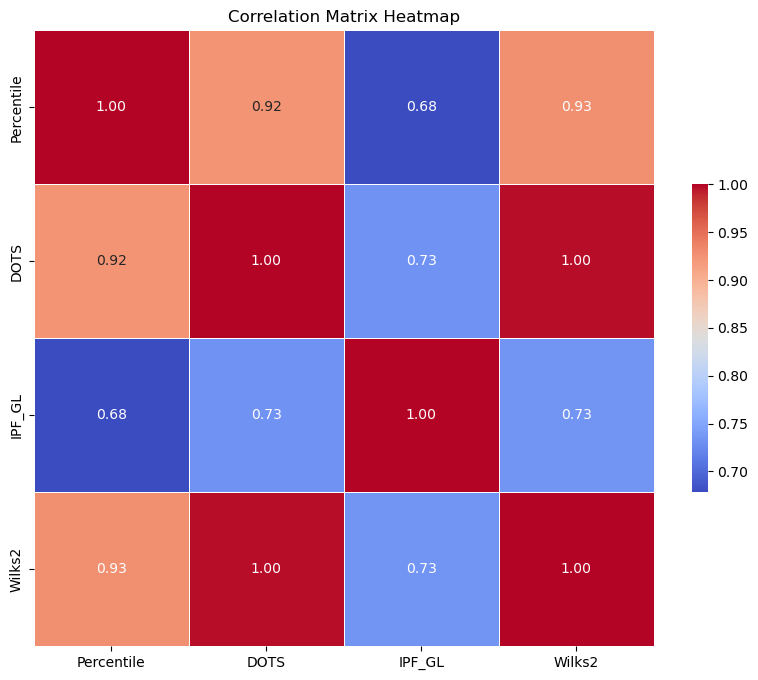

In [433]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df[['Percentile', 'DOTS', 'IPF_GL', 'Wilks2']].corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Matrix Heatmap')
plt.show()


In [445]:
# First, sort the DataFrame by 'Name' and 'Percentile' in descending order to ensure
# the highest percentile is at the top for each group.
df_sorted = df.sort_values(['Name', 'Percentile'], ascending=[True, False])

# Then, drop duplicates, keeping the first occurrence of each 'Name' which,
# due to the sorting, will be the row with the maximum 'Percentile'.
df_max_percentile = df_sorted.drop_duplicates(subset='Name', keep='first')

# Optionally, you may want to sort the resulting DataFrame to see the top 50 Names by Percentile.
df_top50 = df_max_percentile.sort_values('Percentile', ascending=False).head(50)

columns_to_print = ['Name', 'Sex', 'TotalKg', 'BodyweightKg', 'Percentile', 'DOTS', 'IPF_GL', 'Wilks2']

csv_format = df_top50[columns_to_print].to_csv(index=False, sep=',')

# Print the CSV format text
print(csv_format)
# print(df_top50[['Name', 'Sex', 'TotalKg', 'BodyweightKg', 'Percentile', 'DOTS', 'IPF_GL', 'Wilks2']].to_string(index=False))

Name,Sex,TotalKg,BodyweightKg,Percentile,DOTS,IPF_GL,Wilks2
Kristy Hawkins,F,687.5,73.6,99.99999889380508,676.3649699142841,137.66918341809088,807.3500652315988
Samantha Rice,F,702.5,84.45,99.99999352248349,644.7747171756736,132.3909801042263,778.6499139026475
Chakera Ingram,F,692.5,81.5,99.99999291546374,646.5530621706648,132.37712000862686,777.9553236307809
Marianna Gasparyan,F,580.0,57.7,99.99998560529664,659.2404949425571,134.81964787152728,785.5358158164155
John Haack,M,1022.5,89.9,99.99996847174063,661.5198214746079,136.00794508765733,784.7044240429673
Hunter Henderson #1,F,670.0,81.4,99.99996068067134,625.921925887185,128.14126353280562,753.0418489204654
Agata Sitko,F,600.0,68.9,99.99971785227639,612.1988041257442,124.40451282194745,728.5908302054941
Amanda Lawrence #1,F,647.0,83.51,99.99968343919622,597.0001088506649,122.4662853262826,720.098070940344
Sarah Lewis #1,F,597.5,68.7,99.99968057464461,610.6562174458888,124.08757737842487,726.6904800243876
Stefanie Cohen,F,525.0,54.8